# 1 - Learning for Pricing

Consider the case in which all the users belong to class C1. Assume that the curves related to the advertising part of the problem are known, while the curve related to the pricing problem is not. Apply the UCB1 and TS algorithms, reporting the plots of the average (over a sufficiently large number of runs) value and standard deviation of the cumulative regret, cumulative reward, instantaneous regret, and instantaneous reward.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from utils.clairvoyant_tools import get_optimal_parameters
from utils.User_Classes import UserClass
from utils.UCB import *
from utils.learners.Learner import *
import numpy as np
import matplotlib.pyplot as plt
from p1.pricing_environment import *
from p1.TS_learner import TS_Learner
from tqdm import tqdm

## Working in the enviroment

In [2]:
n_arms = 5

uc1 = UserClass(name = "C1")
costs = 200*0.7
p = uc1.get_conversion_probabilities()
opt = p[3] #optimal arm is the one with the highest probability of success
env = Environment_Pricing(n_arms=n_arms, p = p)
margins = [i*0.7 for i in range(50, 251, 50)]
prices = env.prices

T = 365 #time steps for each experiment

n_experiments = 1000

ts_rewards_per_experiment = [] #list to store the collected rewards for TS_Learner over each experiment
ucb_reward_per_experiment = [] #list to store the collected rewards for Greedy_Learner over each experiment
pulled_arm_number = [0 for i in range(0,5)]
# Loop over the experiments
for e in tqdm(range(0, n_experiments)):
    env_pr = Environment_Pricing(n_arms=n_arms, p = p)
    ts_learner = TS_Learner(n_arms=n_arms)
    ucb_learner = UCB(n_arms=n_arms)
    for t in range(0,T):
        #Thompson sampling
        pulled_arm = ts_learner.pull_arm()
        reward = env_pr.round(class_index=0, price_index=pulled_arm, bid=1)
        #print(reward)
        ts_learner.update(pulled_arm, reward/34627)
        ts_learner.update_observations(pulled_arm, reward)
        pulled_arm_number[pulled_arm] += 1
        # Greedy
        pulled_arm = ucb_learner.pull_arm()
        reward = env_pr.round(class_index=0, price_index = pulled_arm, bid=1)
        ucb_learner.update(pulled_arm, reward)


    ts_rewards_per_experiment.append(ts_learner.collected_rewards)
    ucb_reward_per_experiment.append(ucb_learner.collected_rewards)


# Compute the mean and standard deviation of the cumulative reward at each round
mean_cum_reward_ts = np.mean(ts_rewards_per_experiment, axis=0)
mean_cum_reward_ucb = np.mean(ucb_reward_per_experiment, axis=0)
#std_cum_reward_ts = np.std(ts_rewards_per_experiment, axis=0)

reward_ts = mean_cum_reward_ts
reward_ucb = mean_cum_reward_ucb

#std_cum_reward_ucb = np.std(ucb_reward_per_experiment, axis=0)

  0%|          | 2/1000 [00:00<01:19, 12.49it/s]

reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.39760803372206227
reward is 0.1968157510811635
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is 0.7991925990038599
reward is 0.39760803372206227
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is 0.39760803372206227
reward is -0.003976531559735275
reward is 0.1968157510811635
reward is 0.39760803372206227
reward is -0.003976531559735275
reward is 0.1968157510811635
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.1968157510811635
reward is 0.39760803372206227
reward is -0.003976531559735275
reward is -0.003976531

  0%|          | 4/1000 [00:00<01:20, 12.39it/s]

reward is 0.1968157510811635
reward is 0.5984003163629611
reward is 0.1968157510811635
reward is 0.5984003163629611
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.1968157510811635
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.1968157510811635
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.39760803372206227
reward is 0.39760803372206227
reward is -0.003976531559735275
reward is 0.39760803372206227
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is 0.39760803372206227
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.39760803372206227
reward is 0.39760803372206227
reward is 0.39760803372206227
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is 0.39760803372

  1%|          | 8/1000 [00:00<01:20, 12.34it/s]

reward is 0.39760803372206227
reward is 0.1968157510811635
reward is 0.39760803372206227
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is 0.9999848816447585
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.1968157510811635
reward is 0.9999848816447585
reward is 0.39760803372206227
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.5984003163629611
reward is 0.5984003163629611
reward is 0.39760803372206227
reward is 0.1968157510811635
reward is 0.5984003163629611
reward is 0.1968157510811635
reward is 0.5984003163629611
reward is 0.39760803372206227
reward is -0.003976531559735275
reward is 0.1968157510811635
reward is 0.7991925990038599
reward is 0.5984003163629611
rewar

  1%|          | 10/1000 [00:00<01:21, 12.20it/s]

reward is -0.003976531559735275
reward is 0.39760803372206227
reward is -0.003976531559735275
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is 0.39760803372206227
reward is 0.5984003163629611
reward is 0.39760803372206227
reward is 0.5984003163629611
reward is 0.39760803372206227
reward is -0.003976531559735275
reward is 0.1968157510811635
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is 0.39760803372206227
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is 0.9999848816447585
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is 0.9999848816447

  1%|          | 12/1000 [00:00<01:20, 12.28it/s]

reward is 0.9999848816447585
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.1968157510811635
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is 0.5984003163629611
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is 0.39760803372206227
reward is 0.5984003163629611
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0

  2%|▏         | 16/1000 [00:01<01:23, 11.76it/s]

reward is 0.39760803372206227
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is 0.5984003163629611
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is 0.5984003163629611
reward is 0.7991925990038599
reward is 0.1968157510811635
reward is 0.7991925990038599
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.39760803372206227
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.39760803372206227
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.39760803372206227
reward is -0.003976531559735275
reward is 0.59840031

  2%|▏         | 18/1000 [00:01<01:20, 12.14it/s]

reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is 0.39760803372206227
reward is 0.7991925990038599
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is 0.7991925990038599
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is 0.7991925990038599
reward is 0.7991925990038599
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is 0.7991925990038599
reward is 0.7991925990038599
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.0039765

  2%|▏         | 22/1000 [00:01<01:21, 12.00it/s]

reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is 0.5984003163629611
reward is 0.5984003163629611
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.39760803372206227
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is 0.39760803372206227
reward is -0.003976531559735275
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.39760803372206227
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is 0.39760803372206227
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.39760803372206227
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is 

  2%|▏         | 24/1000 [00:01<01:21, 12.04it/s]

reward is 0.1968157510811635
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.39760803372206227
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is 0.1968157510811635
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is 0.1968157510811635
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is 0.39760803372206227
reward is 0.1968157510811635
reward is -0.003976531559735275
reward is 0.7991

  3%|▎         | 26/1000 [00:02<01:20, 12.04it/s]

reward is 0.7991925990038599
reward is 0.7991925990038599
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is 0.7991925990038599
reward is 0.39760803372206227
reward is 0.1968157510811635
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is 0.79919

  3%|▎         | 28/1000 [00:02<01:21, 11.89it/s]

reward is 0.7991925990038599
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is 0.5984003163629611
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is 0.39760803372206227
reward is 0.39760803372206227
reward is 0.9999848816447585
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is 0.9999848816447585
reward is 0.1968157510811635
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is 0.1968157510811635
reward is 0.5984003163629611
reward is 0.39760803372206227
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
r

  3%|▎         | 32/1000 [00:02<01:19, 12.16it/s]

reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is 0.7991925990038599
reward is 0.7991925990038599
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is 0.7991925990038599
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.00397653155

  3%|▎         | 34/1000 [00:02<01:26, 11.15it/s]

reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is 0.1968157510811635
reward is -0.003976531559735275
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is 0.1968157510811635
reward is -0.003976531559735275
reward is 0.1968157510811635
reward is 0.9999848816447585
reward is 0.39760803372206227
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is 0.9999848816447585
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is 0.99998488164

  4%|▎         | 36/1000 [00:03<01:22, 11.74it/s]

reward is -0.003976531559735275
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is 0.1968157510811635
reward is 0.1968157510811635
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is 0.7991925990038599
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.39760803372206227
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is 0.39760803372206227
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.39760803372206227
reward is -0.003976531559735275
reward is 0.5984003163629611
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.5984003163629611
reward is -0.00397653155973

  4%|▍         | 38/1000 [00:03<01:20, 12.00it/s]

reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is 0.7991925990038599
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is 0.5984003163629611
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.5984003163629611
reward is 0.5984003163629611
reward is 0.7991925990038599
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is 0.7991925990038599
reward is 0.7991925990038599
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is -0.00397653

  4%|▍         | 42/1000 [00:03<01:17, 12.44it/s]

reward is 0.9999848816447585
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.5984003163629611
reward is 0.9999848816447585
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.1968157510811635
reward is 0.9999848816447585
reward is 0.5984003163629611
reward

  4%|▍         | 44/1000 [00:03<01:19, 12.10it/s]

reward is -0.003976531559735275
reward is 0.7991925990038599
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.39760803372206227
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is 0.9999848816447585
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.1968157510811635
reward is 0.7991925990038599
reward is 0.9999848816447585
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.1968157510811635
reward is 0.5984003163629611
reward is 0.1968157510811635
reward is -0.003976531559735275
reward is 0.79919259

  5%|▍         | 46/1000 [00:03<01:18, 12.10it/s]

reward is 0.7991925990038599
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is 0.5984003163629611
reward is 0.5984003163629611
reward is 0.7991925990038599
reward is 0.1968157510811635
reward is 0.5984003163629611
reward is 0.1968157510811635
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.5984003163629611
reward is 0.5984003163629611
reward is 0.1968157510811635
reward is 0.1968157510811635
reward is -0.003976531559735275
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is 0.397608033722

  5%|▍         | 48/1000 [00:04<01:27, 10.93it/s]

reward is 0.7991925990038599
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.1968157510811635
reward is -0.003976531559735275
reward is 0.39760803372206227
reward is 0.1968157510811635
reward is 0.7991925990038599
reward is 0.5984003163629611
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is 0.7991925990038599
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is 0.7991925990038599
reward is 0.5984003163629611
reward is 0.39760803372206227
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is 0.7991925990038599
reward is 0.7991925990038599
reward is 0.1968157510811635
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is -0.003976531559735275
rewar

  5%|▌         | 52/1000 [00:04<01:21, 11.68it/s]

reward is 0.1968157510811635
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.39760803372206227
reward is 0.5984003163629611
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is 0.5984003163629611
reward is 0.39760803372206227
reward is 0.5984003163629611
reward is 0.5984003163629611
reward is 0.5984003163629611
reward is 0.1968157510811635
reward is 0.9999848816447585
reward is 0.7991925990038599
reward is 0.5984003163629611
reward is 0.39760803372206227
reward is -0.003976531559735275
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.5984003163629611
reward is 0.39760803372206227
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is 0.39760803372206227
reward is 0.1968157510811635
reward is 0.39760803372206227
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.5984003163629611
reward is -0.003976531559735275
rewa

  5%|▌         | 54/1000 [00:04<01:20, 11.81it/s]

reward is 0.39760803372206227
reward is 0.7991925990038599
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is 0.1968157510811635
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is 0.39760803372206227
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.39760803372206227
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is

  6%|▌         | 58/1000 [00:04<01:15, 12.40it/s]

reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is 0.1968157510811635
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is 0.7991925990038599
reward is -0.00

  6%|▌         | 60/1000 [00:05<01:22, 11.38it/s]

reward is -0.003976531559735275
reward is 0.39760803372206227
reward is 0.7991925990038599
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.39760803372206227
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is 0.39760803372206227
reward is -0.003976531559735275
reward is 0.5984003163629611
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is 0.1968157510811635
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.5984003163629611
reward is 0.1968157510811635
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.00397

  6%|▌         | 62/1000 [00:05<01:25, 11.02it/s]

reward is 0.9999848816447585
reward is 0.7991925990038599
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is 0.1968157510811635
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is 0.1968157510811635
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is 0.39760803372206227
reward is 0.7991925990038599
reward is 0.7991925990038599
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is 0.5984003163629611
reward is 0.5984003163629611
reward is 0.7991925990038599
reward is 0.9999848816447585
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is 0.9999848816447585
reward

  6%|▋         | 64/1000 [00:05<01:21, 11.51it/s]

reward is 0.1968157510811635
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.39760803372206227
reward is 0.39760803372206227
reward is 0.7991925990038599
reward is 0.7991925990038599
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.1968157510811635
reward is -0.003976531559735275
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is 0.39760803372206227
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is 0.799192599

  7%|▋         | 68/1000 [00:05<01:18, 11.95it/s]

reward is -0.003976531559735275
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.5984003163629611
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.5984003163629611
reward is 0.9999848816447585
reward is 0.5984003163629611
reward is 0.39760803372206227
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.1968157510811635
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.39760803372206227
reward is 0.39760803372206227
reward is 0.39760803372206227
reward is -0.003976531559735275
reward is 0.39760803372206227
reward is 0.39760803372206227
reward is -0.003976531559735275
reward is 0.5984003163629611
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is 0.39760803372206227
reward is 0.5984003163629611
reward is -0.0039765315

  7%|▋         | 70/1000 [00:05<01:12, 12.77it/s]

reward is 0.39760803372206227
reward is 0.1968157510811635
reward is 0.5984003163629611
reward is 0.1968157510811635
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is 0.39760803372206227
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.5984003163629611
reward is 0.5984003163629611
reward is 0.5984003163629611
reward is 0.39760803372206227
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is 0.5984003163629611
reward is 0.39760803372206227
reward is -0.003976531559735275
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.5984003163629611
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is -0.003976531559735275


  7%|▋         | 74/1000 [00:06<01:05, 14.21it/s]

reward is 0.7991925990038599
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.1968157510811635
reward is 0.1968157510811635
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is 0.39760803372206227
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.39760803372206227
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is 0.1968157510811635
reward is 0.1968157510811635
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is 0.9999848816447585
reward is 0.7991925990038599
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is 0.39760803372206227
reward is 0.1968157510811635
reward is -0.003976531559735275
reward is -0.00397653155973527

  8%|▊         | 78/1000 [00:06<01:01, 15.05it/s]

reward is 0.9999848816447585
reward is 0.9999848816447585
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is 0.9999848816447585
reward is 0.9999848816447585
reward is 0.9999848816447585
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is 0.9999848816447585
reward is 0.9999848816447585
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is -0.00397653155973527

  8%|▊         | 80/1000 [00:06<01:05, 13.99it/s]

reward is 0.1968157510811635
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is 0.1968157510811635
reward is 0.39760803372206227
reward is 0.1968157510811635
reward is -0.003976531559735275
reward is 0.39760803372206227
reward is 0.39760803372206227
reward is 0.39760803372206227
reward is -0.003976531559735275
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.39760803372206227
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is 0.39760803372206227
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.39760803372206227
reward is -0.003976531559735275
reward is 0.39760803372206227
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is 0.39760803372206227
reward is -0.00397653

  8%|▊         | 82/1000 [00:06<01:02, 14.63it/s]

reward is 0.9999848816447585
reward is 0.7991925990038599
reward is 0.7991925990038599
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is 0.39760803372206227
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is 0.39760803372206227
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.39760803372206227
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is 0.39760803372206227
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.1968157510811635
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is 0.9999848816447585
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is 0.79919259900

  9%|▊         | 86/1000 [00:06<00:59, 15.48it/s]

reward is -0.003976531559735275
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.1968157510811635
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is 0.5984003163629611
reward is 0.5984003163629611
reward is 0.7991925990038599
reward is 0.9999848816447585
reward is 0.7991925990038599
reward is 0.9999848816447585
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is 0.7991925990038599
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is 0.9999848816447585
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is -0.00397653155973527

  9%|▉         | 90/1000 [00:07<01:01, 14.69it/s]

reward is 0.39760803372206227
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is 0.5984003163629611
reward is 0.39760803372206227
reward is 0.5984003163629611
reward is 0.5984003163629611
reward is 0.5984003163629611
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is 0.39760803372206227
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is 0.1968157510811635
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is 0.1968157510811635
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is 0.5984003163629611
reward is 0.5984003163629611
reward is 0.7991925990038599
reward is -0.003976531559735275
rewa

  9%|▉         | 94/1000 [00:07<00:56, 16.09it/s]

reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.1968157510811635
reward is 0.7991925990038599
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is 0.7991925990038599
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.5984003163629611
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is 0.39760803372206227
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is 0.39760803372206227
reward is -0.003976531559735275
reward is 0.5984003163629611
reward is 0.1968157510811635
reward is 0.7991925990038599
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.5984003163629611
reward is -0.003976531559735

 10%|▉         | 96/1000 [00:07<01:02, 14.56it/s]

reward is 0.39760803372206227
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is 0.1968157510811635
reward is 0.39760803372206227
reward is 0.7991925990038599
reward is 0.1968157510811635
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is 0.9999848816447585
reward is 0.5984003163629611
reward is 0.1968157510811635
reward is 0.5984003163629611
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.5984003163629611
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.1968157510811635
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is 0.5984003163629611
rewar

 10%|█         | 100/1000 [00:07<01:01, 14.72it/s]

reward is -0.003976531559735275
reward is 0.5984003163629611
reward is 0.5984003163629611
reward is 0.39760803372206227
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.39760803372206227
reward is 0.1968157510811635
reward is -0.003976531559735275
reward is 0.1968157510811635
reward is 0.39760803372206227
reward is 0.5984003163629611
reward is 0.9999848816447585
reward is 0.39760803372206227
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.39760803372206227
reward is -0.003976531559735275
reward is 0.5984003163629611
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is 0.39760803372206227
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is 0.5984003163629611
reward is 0.1968157510811635
reward is 0.196815751081

 10%|█         | 104/1000 [00:08<00:55, 16.17it/s]

reward is 0.9999848816447585
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.39760803372206227
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is 0.1968157510811635
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is 0.39760803372206227
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.1968157510811635
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is -0.003976531

 11%|█         | 108/1000 [00:08<00:53, 16.57it/s]

reward is 0.9999848816447585
reward is 0.1968157510811635
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is 0.9999848816447585
reward is 0.5984003163629611
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is 0.7991925990038599
reward is 0.9999848816447585
reward is 0.9999848816447585
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is 0.7991925990038599
reward is 0.9999848816447585
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is 0.7991925990038599
reward is 

 11%|█         | 110/1000 [00:08<00:52, 16.81it/s]

reward is 0.39760803372206227
reward is 0.1968157510811635
reward is 0.1968157510811635
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is 0.9999848816447585
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is 0.5984003163629611
reward is 0.1968157510811635
reward is 0.7991925990038599
reward is 0.5984003163629611
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.5984003163629611
reward is 0.39760803372206227
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is -0.003976531559735275

 11%|█▏        | 114/1000 [00:08<00:57, 15.48it/s]

reward is 0.39760803372206227
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is 0.1968157510811635
reward is -0.003976531559735275
reward is 0.39760803372206227
reward is -0.003976531559735275
reward is 0.39760803372206227
reward is -0.003976531559735275
reward is 0.39760803372206227
reward is -0.003976531559735275
reward is 0.39760803372206227
reward is 0.1968157510811635
reward is 0.7991925990038599
reward is 0.39760803372206227
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.1968157510811635
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.39760803372206227
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is 0.1968157510811635
reward is 0.19681575108

 12%|█▏        | 116/1000 [00:08<00:55, 15.91it/s]

reward is 0.7991925990038599
reward is 0.1968157510811635
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is 0.39760803372206227
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.5984003163629611
reward is 0.1968157510811635
reward is 0.39760803372206227
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.39760803372206227
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is 0.1968157510811635
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is 0.999984881

 12%|█▏        | 120/1000 [00:09<00:56, 15.50it/s]

reward is 0.5984003163629611
reward is 0.9999848816447585
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.1968157510811635
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.5984003163629611
reward is 0.9999848816447585
reward is 0.39760803372206227
reward is -0.003976531559735275
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.1968157510811635
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is 0.5984003163629611
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is 0.5984003163629611
reward is 0.59840031636

 12%|█▏        | 124/1000 [00:09<00:55, 15.83it/s]

reward is 0.9999848816447585
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is 0.7991925990038599
reward is 0.7991925990038599
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is 0.39760803372206227
reward is 0.7991925990038599
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is 0.7991925990038599
reward is 0.7991925990038599
reward is 0.39760803372206227
reward is 0.7991925990038599
reward is 0.7991925990038599
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is 0.1968157510811635
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is -0.003976531559735275
reward i

 13%|█▎        | 126/1000 [00:09<00:54, 16.04it/s]

reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.1968157510811635
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is 0.5984003163629611
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is 0.1968157510811635
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is 0.1968157510811635
reward is 0.7991925990038599
reward is 0.39760803372206227
reward is 0.7991925990038599
reward is 0.39760803372206227
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.1968157510811635
reward is -0.003976

 13%|█▎        | 130/1000 [00:09<00:53, 16.26it/s]

reward is 0.9999848816447585
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.5984003163629611
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is 0.5984003163629611
reward is 0.5984003163629611
reward is 0.5984003163629611
reward is 0.5984003163629611
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is 0.5984003163629611
reward is 0.9999848816447585
reward is 0.5984003163629611
reward is 0.39760803372206227
reward is 0.5984003163629611
reward is 0.5984003163629611
reward is 0.39760803372206227
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is 0.39760803372206227
reward is -0.003976531559735275
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
rewa

 13%|█▎        | 134/1000 [00:09<00:52, 16.65it/s]

reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.1968157510811635
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.5984003163629611
reward is 0.9999848816447585
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is -0.00

 14%|█▎        | 136/1000 [00:10<00:52, 16.54it/s]

reward is 0.39760803372206227
reward is 0.1968157510811635
reward is 0.7991925990038599
reward is 0.5984003163629611
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.39760803372206227
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is 0.1968157510811635
reward is -0.003976531559735275
reward is 0.1968157510811635
reward is 0.39760803372206227
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is 0.39760803372206227
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is 0.1968157510811635
reward is 0.7991925990038599
reward is 0.39760803372206227
reward is 0.5984003163629611
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is 0.5984003163629611
reward is 0.5984003163629611
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is 0.5984003163629611
reward is 0.5984003163629611
reward i

 14%|█▍        | 140/1000 [00:10<00:57, 15.08it/s]

reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.1968157510811635
reward is 0.39760803372206227
reward is -0.003976531559735275
reward is 0.1968157510811635
reward is 0.5984003163629611
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is 0.39760803372206227
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.1968157510811635
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is 0.39760803372206227
reward is 0.39760803372206227
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.1968157510811635
reward is -0.003976531559735275
reward is 0.1968157510811635
reward is 0.39760803372206227
reward is 0.1968157510811635
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is -0.003

 14%|█▍        | 142/1000 [00:10<00:54, 15.77it/s]

reward is 0.7991925990038599
reward is -0.003976531559735275
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.1968157510811635
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.1968157510811635
reward is -0.003976531559735275
reward is 0.1968157510811635
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is 0.7991925990038599
reward is 0.1968157510811635
reward is 0.5984003163629611
reward is 0.5984003163629611
reward is 0.1968157510811635
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.5984003163629611
reward is 0.39760803372206227
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is 0.39760803372206227
reward is 0.9999848816447

 15%|█▍        | 146/1000 [00:10<00:57, 14.94it/s]

reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.5984003163629611
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is 0.7991925990038599
reward is 0.5984003163629611
reward is 0.9999848816447585
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is 0.9999848816447585
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.397608

 15%|█▍        | 146/1000 [00:10<01:03, 13.55it/s]


reward is 0.7991925990038599
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.39760803372206227
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is 0.5984003163629611
reward is -0.003976531559735275
reward is 0.7991925990038599
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is -0.003976531559735275
reward is 0.9999848816447585
reward is 0.9999848816447585
reward is -0.003976531559735275
reward is 0.79919259

KeyboardInterrupt: 

### Istantaneous reward

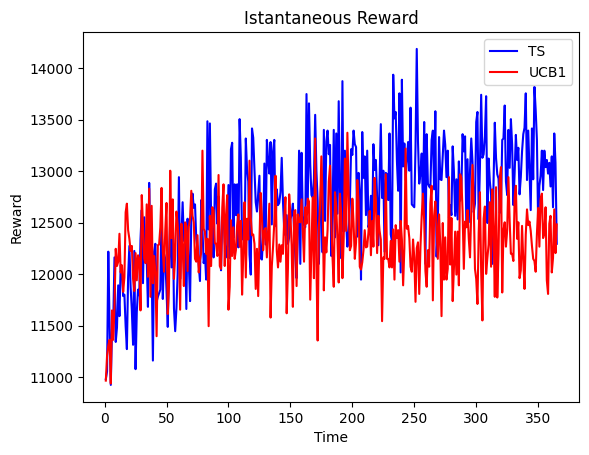

In [ ]:
# Plot the results
plt.plot(range(1, T+1), reward_ts, 'b', label='TS')
plt.plot(range(1, T+1), reward_ucb, 'r', label='UCB1')

plt.xlabel('Time')
plt.ylabel('Reward')
plt.title('Istantaneous Reward')
plt.legend()
plt.show()

### Cumulative reward

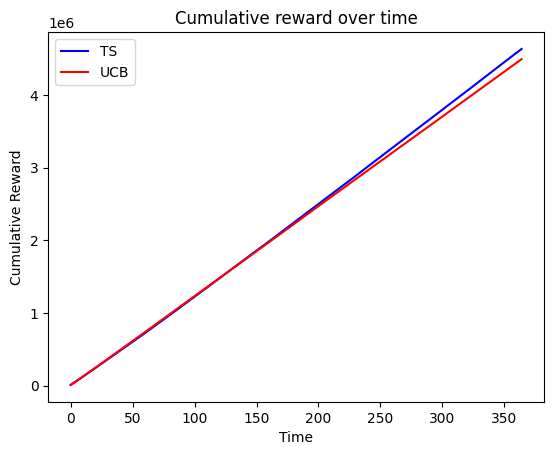

In [ ]:
plt.ylabel("Cumulative Reward")
plt.xlabel("Time")
plt.title("Cumulative reward over time")
plt.plot(np.cumsum(np.mean(ts_rewards_per_experiment, axis=0)), 'b', label='TS')
plt.plot(np.cumsum(np.mean(ucb_reward_per_experiment, axis=0)), 'r', label='UCB')
plt.legend()
plt.show()

### Cumulative regret

200 1.0


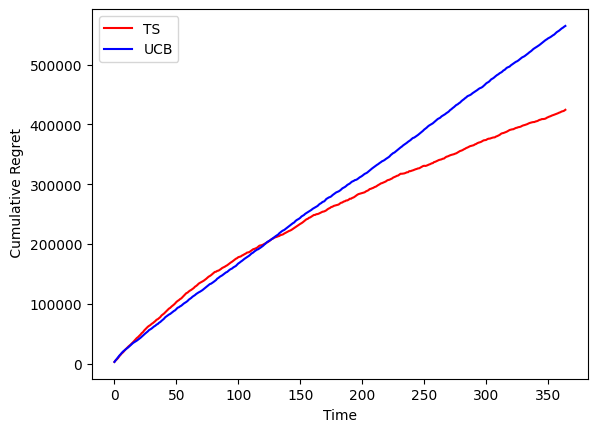

In [ ]:
optimum_price = 200
optimum_bid = 1.0
opt = 200*140*0.5-140
#optimum_price, optimum_bid = get_optimal_parameters(uc1.user_index)
print(optimum_price,optimum_bid)

plt.figure(0)
plt.ylabel(" Cumulative Regret")
plt.xlabel("Time")
plt.plot(np.cumsum(opt - np.array(reward_ts), axis=0), 'r')
plt.plot(np.cumsum(opt - np.array(reward_ucb), axis=0), 'b')
plt.legend(["TS", "UCB"])
plt.show()

### Istantaneous regret

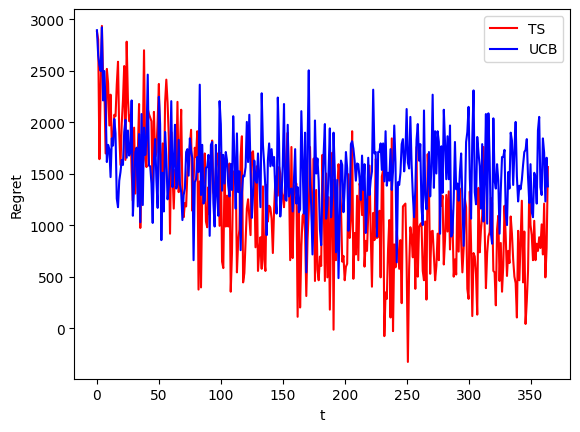

In [ ]:
plt.ylabel("Regret")
plt.xlabel("t")
plt.plot(np.mean(opt - np.array(ts_rewards_per_experiment), axis=0), 'r', label='TS')
plt.plot(np.mean(opt - np.array(ucb_reward_per_experiment), axis=0), 'b', label='UCB')
plt.legend()
plt.show()